# PyCaret Multiclass Classification Tutorial


In [1]:
!pip install pycaret[mlops]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.3/105.3 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.4 MB/s eta 0:00:00
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 57.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━

In [32]:
# check installed version
import pycaret
pycaret.__version__

'3.3.2'

# Quick start

In [5]:
# loading sample dataset from pycaret dataset module
from pycaret.datasets import get_data
data = get_data('wine')
print(data['type'].unique())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


['red' 'white']


## Setup

In [6]:
# import pycaret classification and init setup
from pycaret.classification import *
s = setup(data, target = 'type', session_id = 123)

,Description,Value
0,Session id,123
1,Target,type
2,Target type,Binary
3,Target mapping,"red: 0, white: 1"
4,Original data shape,"(6497, 13)"
5,Transformed data shape,"(6497, 13)"
6,Transformed train set shape,"(4547, 13)"
7,Transformed test set shape,"(1950, 13)"
8,Numeric features,12
9,Preprocess,True


In [7]:
# import ClassificationExperiment and init the class
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()

In [33]:
# check the type of exp
type(exp)

pycaret.classification.oop.ClassificationExperiment

In [9]:
# init setup on exp
exp.setup(data, target = 'type', session_id = 123)

,Description,Value
0,Session id,123
1,Target,type
2,Target type,Binary
3,Target mapping,"red: 0, white: 1"
4,Original data shape,"(6497, 13)"
5,Transformed data shape,"(6497, 13)"
6,Transformed train set shape,"(4547, 13)"
7,Transformed test set shape,"(1950, 13)"
8,Numeric features,12
9,Preprocess,True


## Compare Models

In [10]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9956,0.9987,0.9956,0.9956,0.9956,0.9881,0.9881,0.6040
xgboost,Extreme Gradient Boosting,0.9949,0.9990,0.9949,0.9950,0.9949,0.9863,0.9864,0.1410
lightgbm,Light Gradient Boosting Machine,0.9947,0.9990,0.9947,0.9947,0.9947,0.9858,0.9858,0.6090
lda,Linear Discriminant Analysis,0.9945,0.9955,0.9945,0.9945,0.9945,0.9852,0.9852,0.0570
rf,Random Forest Classifier,0.9941,0.9988,0.9941,0.9941,0.9940,0.9839,0.9840,0.5640
gbc,Gradient Boosting Classifier,0.9936,0.9985,0.9936,0.9936,0.9936,0.9827,0.9828,0.7510
ada,Ada Boost Classifier,0.9934,0.9985,0.9934,0.9934,0.9934,0.9822,0.9823,0.5610
qda,Quadratic Discriminant Analysis,0.9842,0.9931,0.9842,0.9848,0.9843,0.9580,0.9585,0.1350
ridge,Ridge Classifier,0.9839,0.9932,0.9839,0.9840,0.9839,0.9563,0.9566,0.0610
dt,Decision Tree Classifier,0.9833,0.9785,0.9833,0.9834,0.9833,0.9551,0.9552,0.0860


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [11]:
# compare models using OOP
exp.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9956,0.9987,0.9956,0.9956,0.9956,0.9881,0.9881,0.5830
xgboost,Extreme Gradient Boosting,0.9949,0.9990,0.9949,0.9950,0.9949,0.9863,0.9864,0.1330
lightgbm,Light Gradient Boosting Machine,0.9947,0.9990,0.9947,0.9947,0.9947,0.9858,0.9858,0.7390
lda,Linear Discriminant Analysis,0.9945,0.9955,0.9945,0.9945,0.9945,0.9852,0.9852,0.0550
rf,Random Forest Classifier,0.9941,0.9988,0.9941,0.9941,0.9940,0.9839,0.9840,0.5710
gbc,Gradient Boosting Classifier,0.9936,0.9985,0.9936,0.9936,0.9936,0.9827,0.9828,0.7490
ada,Ada Boost Classifier,0.9934,0.9985,0.9934,0.9934,0.9934,0.9822,0.9823,0.4290
qda,Quadratic Discriminant Analysis,0.9842,0.9931,0.9842,0.9848,0.9843,0.9580,0.9585,0.0960
ridge,Ridge Classifier,0.9839,0.9932,0.9839,0.9840,0.9839,0.9563,0.9566,0.0570
dt,Decision Tree Classifier,0.9833,0.9785,0.9833,0.9834,0.9833,0.9551,0.9552,0.0720


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

## Analyze Model

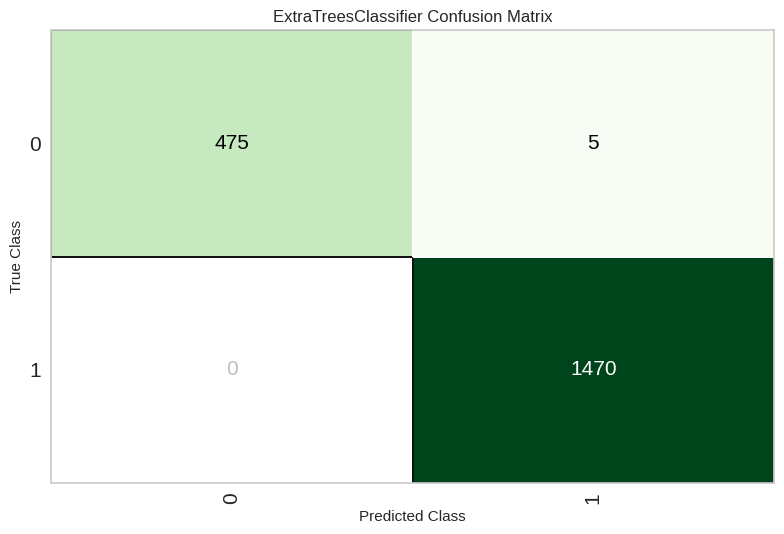

In [12]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')

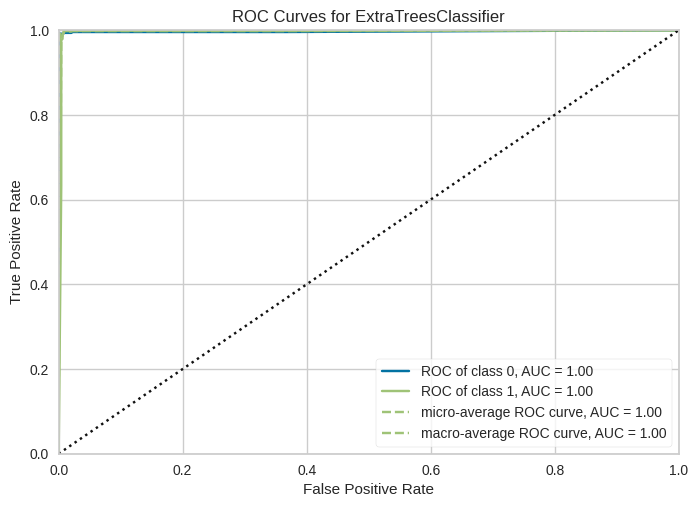

In [13]:
# plot AUC
plot_model(best, plot = 'auc')

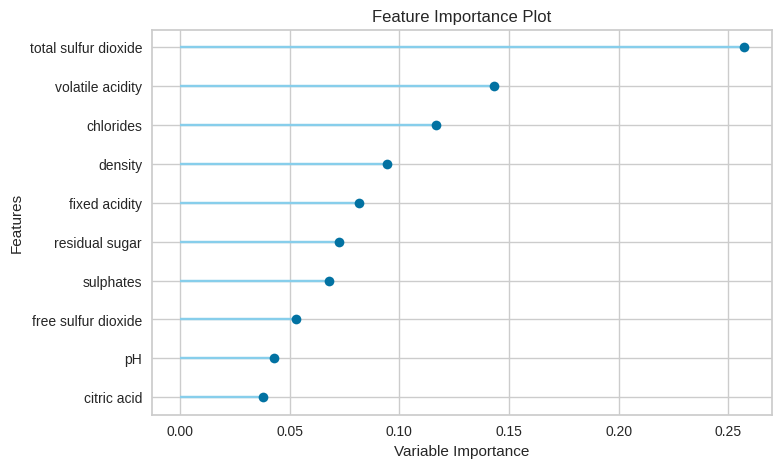

In [14]:
# plot feature importance
plot_model(best, plot = 'feature')

In [15]:
# check docstring to see available plots
help(plot_model)

Help on function plot_model in module pycaret.classification.functional:

plot_model(estimator, plot: str = 'auc', scale: float = 1, save: bool = False, fold: Union[int, Any, NoneType] = None, fit_kwargs: Optional[dict] = None, plot_kwargs: Optional[dict] = None, groups: Union[str, Any, NoneType] = None, verbose: bool = True, display_format: Optional[str] = None) -> Optional[str]
    This function analyzes the performance of a trained model on holdout set.
    It may require re-training the model in certain cases.
    
    Example
    -------
    >>> from pycaret.datasets import get_data
    >>> juice = get_data('juice')
    >>> from pycaret.classification import *
    >>> exp_name = setup(data = juice,  target = 'Purchase')
    >>> lr = create_model('lr')
    >>> plot_model(lr, plot = 'auc')
    
    
    estimator: scikit-learn compatible object
        Trained model object
    
    
    plot: str, default = 'auc'
        List of available plots (ID - Name):
    
        * 'pipeline'

An alternate to `plot_model` function is `evaluate_model`. It can only be used in Notebook since it uses ipywidget.

In [16]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Prediction

In [17]:
# predict on test set
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9974,0.9971,0.9974,0.9974,0.9974,0.9931,0.9931


In [18]:
# show predictions df
holdout_pred.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,prediction_label,prediction_score
5420,6.9,0.280,0.28,12.2,0.042,52.0,139.0,0.99522,3.03,0.56,10.4,6,white,white,1.00
1943,5.4,0.290,0.47,3.0,0.052,47.0,145.0,0.99300,3.29,0.75,10.0,6,white,white,0.99
6116,6.8,0.170,0.17,5.1,0.049,26.0,82.0,0.99300,3.00,0.38,9.8,6,white,white,1.00
1461,6.2,0.785,0.00,2.1,0.060,6.0,13.0,0.99664,3.59,0.61,10.0,4,red,red,0.99
2390,5.9,0.240,0.30,2.0,0.033,28.0,92.0,0.99225,3.39,0.69,10.9,7,white,white,1.00


In [19]:
# copy data and drop Class variable

new_data = data.copy()
new_data.drop('type', axis=1, inplace=True)
new_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [20]:
# predict model on new_data
predictions = predict_model(best, data = new_data)
predictions.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,prediction_label,prediction_score
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,1.00
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,1.00
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,0.99
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,0.95
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,1.00


## Save Model

In [22]:
# save pipeline
save_model(best, 'wine_type_prediction_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['fixed acidity',
                                              'volatile acidity', 'citric acid',
                                              'residual sugar', 'chlorides',
                                              'free sulfur dioxide',
                                              'total sulfur dioxide', 'density',
                                              'pH', 'sulphates...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='sqrt',
                    

In [23]:
# load pipeline
loaded_best_pipeline = load_model('wine_type_prediction_model')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['fixed acidity',
                                             'volatile acidity', 'citric acid',
                                             'residual sugar', 'chlorides',
                                             'free sulfur dioxide',
                                             'total sulfur dioxide', 'density',
                                             'pH'...
                 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                      class_weight=None, criterion='gini',
                                      max_depth=None, max_features='sqrt',
                                      max_leaf_nodes=None, max_samples=None,
                                      min_impurity_decrease=0.0,
                                      min_samples_leaf=1, min_samples_split=2,
                                      min_weight_fraction_leaf=0.0,
                                      monotonic_cst=None, n_estimators=100,
                                      n_jobs=-1, oob_score=False,
                                      random_state=123, verbose=0,
                                      warm_start=False))],
         verbose=False)

# Detailed function-by-function overview

## Setup

In [24]:
s = setup(data, target = 'type', session_id = 123)

,Description,Value
0,Session id,123
1,Target,type
2,Target type,Binary
3,Target mapping,"red: 0, white: 1"
4,Original data shape,"(6497, 13)"
5,Transformed data shape,"(6497, 13)"
6,Transformed train set shape,"(4547, 13)"
7,Transformed test set shape,"(1950, 13)"
8,Numeric features,12
9,Preprocess,True


In [25]:
# check all available config
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fix_imbalance',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [26]:
# lets access X_train_transformed
get_config('X_train_transformed')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3889,7.4,0.18,0.24,1.4,0.047,21.0,106.0,0.99383,3.52,0.64,10.5,7.0
3587,8.0,0.22,0.32,10.4,0.043,63.0,201.0,0.99700,3.11,0.53,9.5,6.0
4355,8.6,0.33,0.34,11.8,0.059,42.0,240.0,0.99882,3.17,0.52,10.0,6.0
2434,7.5,0.42,0.34,4.3,0.040,34.0,108.0,0.99155,3.14,0.45,12.8,8.0
2110,7.8,0.34,0.35,1.8,0.042,8.0,167.0,0.99080,3.11,0.41,12.1,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3678,7.4,0.45,0.32,7.1,0.044,17.0,117.0,0.99620,3.32,0.41,10.4,4.0
145,8.1,0.67,0.55,1.8,0.117,32.0,141.0,0.99680,3.17,0.62,9.4,5.0
2129,6.4,0.10,0.35,4.9,0.048,31.0,103.0,0.99470,3.43,0.79,9.7,6.0
2858,6.2,0.21,0.38,6.8,0.036,64.0,245.0,0.99510,3.06,0.36,9.3,6.0


In [27]:
# another example: let's access seed
print("The current seed is: {}".format(get_config('seed')))

# now lets change it using set_config
set_config('seed', 786)
print("The new seed is: {}".format(get_config('seed')))

The current seed is: 123
The new seed is: 786


In [28]:
# init setup with normalize = True

s = setup(data, target = 'type', session_id = 123,
          normalize = True, normalize_method = 'minmax')

,Description,Value
0,Session id,123
1,Target,type
2,Target type,Binary
3,Target mapping,"red: 0, white: 1"
4,Original data shape,"(6497, 13)"
5,Transformed data shape,"(6497, 13)"
6,Transformed train set shape,"(4547, 13)"
7,Transformed test set shape,"(1950, 13)"
8,Numeric features,12
9,Preprocess,True


<Axes: >

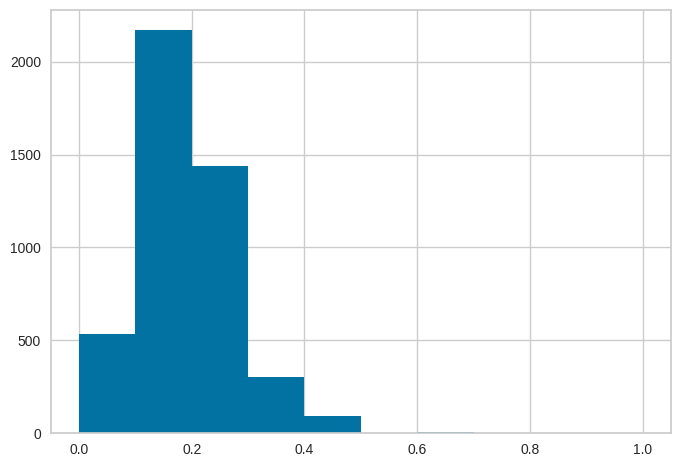

In [30]:
# lets check the X_train_transformed to see effect of params passed
get_config('X_train_transformed')['citric acid'].hist()

<Axes: >

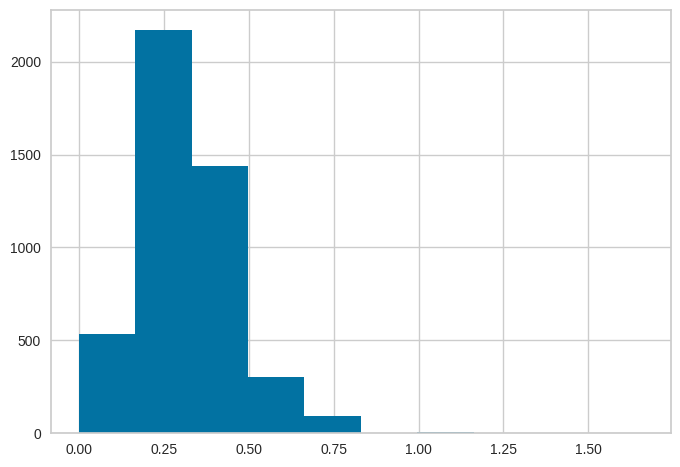

In [31]:
get_config('X_train')['citric acid'].hist()

## Compare Models

In [34]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9956,0.9987,0.9956,0.9956,0.9956,0.9881,0.9881,0.6080
xgboost,Extreme Gradient Boosting,0.9949,0.9990,0.9949,0.9950,0.9949,0.9863,0.9864,0.1420
lightgbm,Light Gradient Boosting Machine,0.9947,0.9990,0.9947,0.9947,0.9947,0.9858,0.9858,0.2950
lda,Linear Discriminant Analysis,0.9945,0.9955,0.9945,0.9945,0.9945,0.9852,0.9852,0.0650
rf,Random Forest Classifier,0.9941,0.9988,0.9941,0.9941,0.9940,0.9839,0.9840,0.5620
gbc,Gradient Boosting Classifier,0.9936,0.9985,0.9936,0.9936,0.9936,0.9827,0.9828,0.7680
ada,Ada Boost Classifier,0.9934,0.9985,0.9934,0.9934,0.9934,0.9822,0.9823,0.4820
ridge,Ridge Classifier,0.9914,0.9947,0.9914,0.9915,0.9914,0.9768,0.9769,0.0630
knn,K Neighbors Classifier,0.9910,0.9964,0.9910,0.9910,0.9910,0.9757,0.9758,0.2650
svm,SVM - Linear Kernel,0.9888,0.9942,0.9888,0.9889,0.9888,0.9698,0.9700,0.0670


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [35]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [37]:
compare_tree_models = compare_models(include = ['dt', 'rf', 'et', 'gbc', 'xgboost', 'lightgbm', 'knn'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9956,0.9987,0.9956,0.9956,0.9956,0.9881,0.9881,0.5960
xgboost,Extreme Gradient Boosting,0.9949,0.9990,0.9949,0.9950,0.9949,0.9863,0.9864,0.1640
lightgbm,Light Gradient Boosting Machine,0.9947,0.9990,0.9947,0.9947,0.9947,0.9858,0.9858,0.7440
rf,Random Forest Classifier,0.9941,0.9988,0.9941,0.9941,0.9940,0.9839,0.9840,0.6250
gbc,Gradient Boosting Classifier,0.9936,0.9985,0.9936,0.9936,0.9936,0.9827,0.9828,0.7690
knn,K Neighbors Classifier,0.9910,0.9964,0.9910,0.9910,0.9910,0.9757,0.9758,0.1500
dt,Decision Tree Classifier,0.9833,0.9785,0.9833,0.9834,0.9833,0.9551,0.9552,0.0830


Processing:   0%|          | 0/33 [00:00<?, ?it/s]

In [38]:
compare_tree_models

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

In [39]:
compare_tree_models_results = pull()
compare_tree_models_results

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9956,0.9987,0.9956,0.9956,0.9956,0.9881,0.9881,0.596
xgboost,Extreme Gradient Boosting,0.9949,0.9990,0.9949,0.9950,0.9949,0.9863,0.9864,0.164
lightgbm,Light Gradient Boosting Machine,0.9947,0.9990,0.9947,0.9947,0.9947,0.9858,0.9858,0.744
rf,Random Forest Classifier,0.9941,0.9988,0.9941,0.9941,0.9940,0.9839,0.9840,0.625
gbc,Gradient Boosting Classifier,0.9936,0.9985,0.9936,0.9936,0.9936,0.9827,0.9828,0.769
knn,K Neighbors Classifier,0.9910,0.9964,0.9910,0.9910,0.9910,0.9757,0.9758,0.150
dt,Decision Tree Classifier,0.9833,0.9785,0.9833,0.9834,0.9833,0.9551,0.9552,0.083


In [40]:
best_recall_models_top3 = compare_models(sort = 'Recall', n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9956,0.9987,0.9956,0.9956,0.9956,0.9881,0.9881,0.3420
xgboost,Extreme Gradient Boosting,0.9949,0.9990,0.9949,0.9950,0.9949,0.9863,0.9864,0.1390
lightgbm,Light Gradient Boosting Machine,0.9947,0.9990,0.9947,0.9947,0.9947,0.9858,0.9858,0.4100
lda,Linear Discriminant Analysis,0.9945,0.9955,0.9945,0.9945,0.9945,0.9852,0.9852,0.1140
rf,Random Forest Classifier,0.9941,0.9988,0.9941,0.9941,0.9940,0.9839,0.9840,0.8540
gbc,Gradient Boosting Classifier,0.9936,0.9985,0.9936,0.9936,0.9936,0.9827,0.9828,0.9720
ada,Ada Boost Classifier,0.9934,0.9985,0.9934,0.9934,0.9934,0.9822,0.9823,0.2930
ridge,Ridge Classifier,0.9914,0.9947,0.9914,0.9915,0.9914,0.9768,0.9769,0.0660
knn,K Neighbors Classifier,0.9910,0.9964,0.9910,0.9910,0.9910,0.9757,0.9758,0.1400
svm,SVM - Linear Kernel,0.9888,0.9942,0.9888,0.9889,0.9888,0.9698,0.9700,0.0680


Processing:   0%|          | 0/67 [00:00<?, ?it/s]

In [42]:
best_recall_models_top3

[ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                      criterion='gini', max_depth=None, max_features='sqrt',
                      max_leaf_nodes=None, max_samples=None,
                      min_impurity_decrease=0.0, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      monotonic_cst=None, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=123, verbose=0,
                      warm_start=False),
 XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device='cpu', early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=N

## Create Model

In [43]:
# check all the available models
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [44]:
# train logistic regression with default fold=10
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9824,0.9975,0.9824,0.9824,0.9824,0.9523,0.9524
1,0.9802,0.9937,0.9802,0.9803,0.9802,0.9469,0.9469
2,0.9846,0.9864,0.9846,0.9847,0.9845,0.9579,0.9583
3,0.9780,0.9988,0.9780,0.9780,0.9779,0.9401,0.9403
4,0.9890,0.9988,0.9890,0.9890,0.9890,0.9701,0.9703
5,0.9846,0.9840,0.9846,0.9846,0.9845,0.9582,0.9583
6,0.9890,0.9930,0.9890,0.9890,0.9890,0.9701,0.9703
7,0.9912,0.9993,0.9912,0.9913,0.9911,0.9759,0.9761
8,0.9890,0.9946,0.9890,0.9890,0.9890,0.9703,0.9703


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [45]:
lr_results = pull()
print(type(lr_results))
lr_results

<class 'pandas.core.frame.DataFrame'>


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9824,0.9975,0.9824,0.9824,0.9824,0.9523,0.9524
1,0.9802,0.9937,0.9802,0.9803,0.9802,0.9469,0.9469
2,0.9846,0.9864,0.9846,0.9847,0.9845,0.9579,0.9583
3,0.9780,0.9988,0.9780,0.9780,0.9779,0.9401,0.9403
4,0.9890,0.9988,0.9890,0.9890,0.9890,0.9701,0.9703
5,0.9846,0.9840,0.9846,0.9846,0.9845,0.9582,0.9583
6,0.9890,0.9930,0.9890,0.9890,0.9890,0.9701,0.9703
7,0.9912,0.9993,0.9912,0.9913,0.9911,0.9759,0.9761
8,0.9890,0.9946,0.9890,0.9890,0.9890,0.9703,0.9703


In [46]:
# train logistic regression with fold=3
lr = create_model('lr', fold=3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9861,0.9934,0.9861,0.9861,0.9861,0.9625,0.9625
1,0.9842,0.9945,0.9842,0.9842,0.9841,0.9568,0.9571
2,0.9855,0.9928,0.9855,0.9855,0.9854,0.9604,0.9607
Mean,0.9853,0.9935,0.9853,0.9853,0.9852,0.9599,0.9601
Std,0.0008,0.0007,0.0008,0.0008,0.0008,0.0024,0.0023


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [47]:
# train logistic regression with specific model parameters
create_model('lr', C = 0.5, l1_ratio = 0.15)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9824,0.9972,0.9824,0.9824,0.9824,0.9523,0.9524
1,0.9758,0.9932,0.9758,0.9757,0.9757,0.9343,0.9344
2,0.9846,0.9860,0.9846,0.9847,0.9845,0.9579,0.9583
3,0.9714,0.9988,0.9714,0.9714,0.9711,0.9214,0.9222
4,0.9868,0.9986,0.9868,0.9869,0.9867,0.9640,0.9643
5,0.9824,0.9837,0.9824,0.9824,0.9823,0.9520,0.9523
6,0.9890,0.9930,0.9890,0.9890,0.9890,0.9701,0.9703
7,0.9868,0.9992,0.9868,0.9870,0.9867,0.9636,0.9642
8,0.9868,0.9943,0.9868,0.9868,0.9868,0.9644,0.9644


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=0.15, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
# train lr and return train score as well alongwith CV
create_model('lr', return_train_score=True)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Tune Model

In [49]:
# train a dt model with default params
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9868,0.9822,0.9868,0.9868,0.9868,0.9645,0.9645
1,0.9758,0.9689,0.9758,0.9759,0.9759,0.9351,0.9351
2,0.9890,0.9777,0.9890,0.9892,0.9889,0.9699,0.9704
3,0.9824,0.9793,0.9824,0.9826,0.9825,0.9529,0.9530
4,0.9912,0.9912,0.9912,0.9913,0.9912,0.9765,0.9765
5,0.9780,0.9764,0.9780,0.9785,0.9782,0.9415,0.9417
6,0.9890,0.9867,0.9890,0.9891,0.9890,0.9705,0.9705
7,0.9846,0.9746,0.9846,0.9846,0.9845,0.9579,0.9580
8,0.9802,0.9778,0.9802,0.9805,0.9803,0.9471,0.9473


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [50]:
# tune hyperparameters of dt
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9912,0.9868,0.9912,0.9912,0.9912,0.9762,0.9762
1,0.9758,0.9872,0.9758,0.9757,0.9757,0.9343,0.9344
2,0.9868,0.9857,0.9868,0.9868,0.9868,0.9643,0.9643
3,0.9824,0.9890,0.9824,0.9824,0.9824,0.9526,0.9526
4,0.9956,0.9943,0.9956,0.9957,0.9956,0.9882,0.9883
5,0.9912,0.9888,0.9912,0.9912,0.9912,0.9763,0.9763
6,0.9780,0.9897,0.9780,0.9783,0.9777,0.9393,0.9404
7,0.9912,0.9909,0.9912,0.9912,0.9912,0.9760,0.9761
8,0.9846,0.9749,0.9846,0.9846,0.9845,0.9581,0.9583


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [51]:
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=123, splitter='best')

In [52]:
# define tuning grid
dt_grid = {'max_depth' : [None, 2, 4, 6, 8, 10, 12]}

# tune model with custom grid and metric = F1
tuned_dt = tune_model(dt, custom_grid = dt_grid, optimize = 'F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9912,0.9798,0.9912,0.9912,0.9912,0.9762,0.9762
1,0.9736,0.9608,0.9736,0.9736,0.9736,0.9289,0.9289
2,0.9846,0.9671,0.9846,0.9847,0.9845,0.9579,0.9583
3,0.9912,0.9960,0.9912,0.9912,0.9912,0.9763,0.9763
4,0.9978,0.9912,0.9978,0.9978,0.9978,0.9941,0.9941
5,0.9780,0.9744,0.9780,0.9782,0.9781,0.9411,0.9412
6,0.9890,0.9729,0.9890,0.9890,0.9890,0.9701,0.9703
7,0.9868,0.9765,0.9868,0.9868,0.9867,0.9640,0.9641
8,0.9780,0.9636,0.9780,0.9779,0.9779,0.9404,0.9404


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 7 candidates, totalling 70 fits


In [53]:
# to access the tuner object you can set return_tuner = True
tuned_dt, tuner = tune_model(dt, return_tuner=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9912,0.9868,0.9912,0.9912,0.9912,0.9762,0.9762
1,0.9758,0.9872,0.9758,0.9757,0.9757,0.9343,0.9344
2,0.9868,0.9857,0.9868,0.9868,0.9868,0.9643,0.9643
3,0.9824,0.9890,0.9824,0.9824,0.9824,0.9526,0.9526
4,0.9956,0.9943,0.9956,0.9957,0.9956,0.9882,0.9883
5,0.9912,0.9888,0.9912,0.9912,0.9912,0.9763,0.9763
6,0.9780,0.9897,0.9780,0.9783,0.9777,0.9393,0.9404
7,0.9912,0.9909,0.9912,0.9912,0.9912,0.9760,0.9761
8,0.9846,0.9749,0.9846,0.9846,0.9845,0.9581,0.9583


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [54]:
# model object
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.002, min_samples_leaf=5,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=123, splitter='best')

In [55]:
# tuner object
tuner

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=Pipeline(memory=Memory(location=None),
                                      steps=[('label_encoding',
                                              TransformerWrapperWithInverse(exclude=None,
                                                                            include=None,
                                                                            transformer=LabelEncoder())),
                                             ('numerical_imputer',
                                              TransformerWrapper(exclude=None,
                                                                 include=['fixed '
                                                                          'acidity',
                                                                          'volatile '
                                                                          'aci...
                                        'actual_estimator__max_features': [1.0,
                                                                           'sqrt',
                                                                           'log2'],
                                        'actual_estimator__min_impurity_decrease': [0,
                                                                                    0.0001,
                                                                                    0.001,
                                                                                    0.01,
                                                                                    0.0002,
                                                                                    0.002,
                                                                                    0.02,
                                                                                    0.0005,
                                                                                    0.005,
                                                                                    0.05,
                                                                                    0.1,
                                                                                    0.2,
                                                                                    0.3,
                                                                                    0.4,
                                                                                    0.5],
                                        'actual_estimator__min_samples_leaf': [2,
                                                                               3,
                                                                               4,
                                                                               5,
                                                                               6],
                                        'actual_estimator__min_samples_split': [2,
                                                                                5,
                                                                                7,
                                                                                9,
                                                                                10]},
                   pre_dispatch='2*n_jobs', random_state=123, refit=False,
                   return_train_score=False, scoring='accuracy', verbose=1)

## ✅ Ensemble Model

In [63]:
# ensemble with bagging
ensemble_model(dt, method = 'Bagging')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9890,0.9951,0.9890,0.9891,0.9890,0.9705,0.9705
1,0.9780,0.9945,0.9780,0.9788,0.9782,0.9418,0.9424
2,0.9890,0.9904,0.9890,0.9890,0.9890,0.9701,0.9703
3,0.9912,0.9981,0.9912,0.9912,0.9912,0.9763,0.9763
4,0.9934,0.9999,0.9934,0.9936,0.9934,0.9824,0.9825
5,0.9846,0.9973,0.9846,0.9847,0.9846,0.9587,0.9587
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9912,0.9900,0.9912,0.9913,0.9911,0.9759,0.9761
8,0.9912,0.9945,0.9912,0.9912,0.9912,0.9763,0.9763


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

BaggingClassifier(bootstrap=True, bootstrap_features=False,
                  estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                   class_weight=None,
                                                   criterion='gini',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   monotonic_cst=None,
                                                   random_state=123,
                                                   splitter='best'),
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=123, verbose=0,
                  warm_start=False)

In [64]:
# ensemble with boosting
ensemble_model(dt, method = 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9846,0.9948,0.9846,0.9846,0.9845,0.9582,0.9583
1,0.9758,0.9892,0.9758,0.9758,0.9758,0.9347,0.9347
2,0.9890,0.9953,0.9890,0.9890,0.9890,0.9703,0.9703
3,0.9846,0.9838,0.9846,0.9849,0.9847,0.9589,0.9591
4,0.9934,1.0000,0.9934,0.9936,0.9934,0.9824,0.9825
5,0.9824,0.9847,0.9824,0.9826,0.9825,0.9529,0.9530
6,0.9802,0.9948,0.9802,0.9802,0.9802,0.9465,0.9466
7,0.9802,0.9902,0.9802,0.9801,0.9801,0.9462,0.9462
8,0.9802,0.9748,0.9802,0.9802,0.9802,0.9468,0.9468


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

AdaBoostClassifier(algorithm='SAMME.R',
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    monotonic_cst=None,
                                                    random_state=123,
                                                    splitter='best'),
                   learning_rate=1.0, n_estimators=10, random_state=123)

## ✅ Blend Models

In [65]:
# top 3 models based on recall
best_recall_models_top3

[ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                      criterion='gini', max_depth=None, max_features='sqrt',
                      max_leaf_nodes=None, max_samples=None,
                      min_impurity_decrease=0.0, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      monotonic_cst=None, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=123, verbose=0,
                      warm_start=False),
 XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device='cpu', early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=N

In [66]:
# blend top 3 models
blend_models(best_recall_models_top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9956,0.9999,0.9956,0.9956,0.9956,0.9881,0.9882
1,0.9912,0.9986,0.9912,0.9912,0.9912,0.9763,0.9763
2,0.9956,0.9995,0.9956,0.9956,0.9956,0.9881,0.9882
3,0.9956,0.9997,0.9956,0.9957,0.9956,0.9882,0.9883
4,0.9978,1.0000,0.9978,0.9978,0.9978,0.9941,0.9941
5,0.9934,0.9990,0.9934,0.9934,0.9934,0.9822,0.9822
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9934,0.9997,0.9934,0.9934,0.9934,0.9821,0.9821
8,0.9956,0.9938,0.9956,0.9956,0.9956,0.9881,0.9881


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

VotingClassifier(estimators=[('Extra Trees Classifier',
                              ExtraTreesClassifier(bootstrap=False,
                                                   ccp_alpha=0.0,
                                                   class_weight=None,
                                                   criterion='gini',
                                                   max_depth=None,
                                                   max_features='sqrt',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   monotonic_cst=None,
                                                   n_estimators=100, n_jobs=-1...
                                             importance_type='split',
                                             learning_rate=0.1, max_depth=-1,
                                             min_child_samples=20,
                                             min_child_weight=0.001,
                                             min_split_gain=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             num_leaves=31, objective=None,
                                             random_state=123, reg_alpha=0.0,
                                             reg_lambda=0.0, subsample=1.0,
                                             subsample_for_bin=200000,
                                             subsample_freq=0))],
                 flatten_transform=True, n_jobs=-1, verbose=False,
                 voting='soft', weights=None)

## ✅ Stack Models

In [67]:
# stack models
stack_models(best_recall_models_top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9956,0.9999,0.9956,0.9956,0.9956,0.9881,0.9882
1,0.9934,0.9986,0.9934,0.9934,0.9934,0.9822,0.9822
2,0.9956,0.9995,0.9956,0.9956,0.9956,0.9881,0.9882
3,0.9978,0.9996,0.9978,0.9978,0.9978,0.9941,0.9941
4,0.9978,1.0000,0.9978,0.9978,0.9978,0.9941,0.9941
5,0.9934,0.9990,0.9934,0.9934,0.9934,0.9822,0.9822
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9956,0.9997,0.9956,0.9956,0.9956,0.9880,0.9881
8,0.9956,0.9938,0.9956,0.9956,0.9956,0.9881,0.9881


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

StackingClassifier(cv=5,
                   estimators=[('Extra Trees Classifier',
                                ExtraTreesClassifier(bootstrap=False,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='sqrt',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     monotonic_cst=None,
                                                     n_estimators=100,
                                                     n_...
                                               subsample_for_bin=200000,
                                               subsample_freq=0))],
                   final_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                      dual=False,
                                                      fit_intercept=True,
                                                      intercept_scaling=1,
                                                      l1_ratio=None,
                                                      max_iter=1000,
                                                      multi_class='auto',
                                                      n_jobs=None, penalty='l2',
                                                      random_state=123,
                                                      solver='lbfgs',
                                                      tol=0.0001, verbose=0,
                                                      warm_start=False),
                   n_jobs=-1, passthrough=False, stack_method='auto',
                   verbose=0)

## ✅ Plot Model

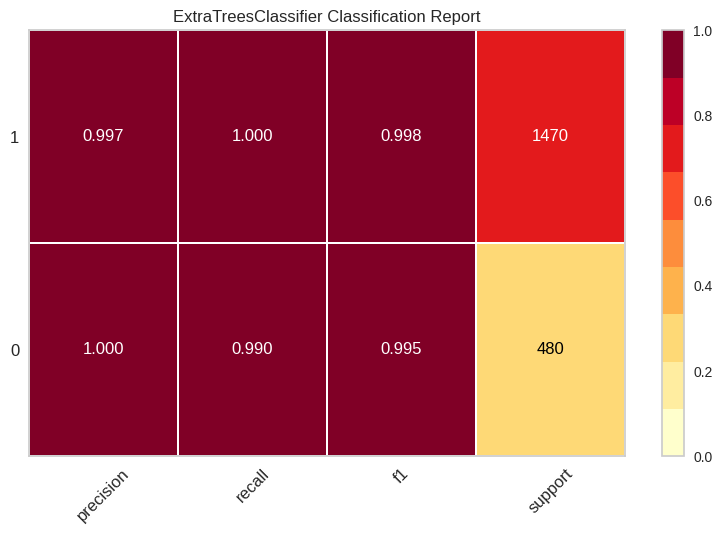

In [68]:
# plot class report
plot_model(best, plot = 'class_report')

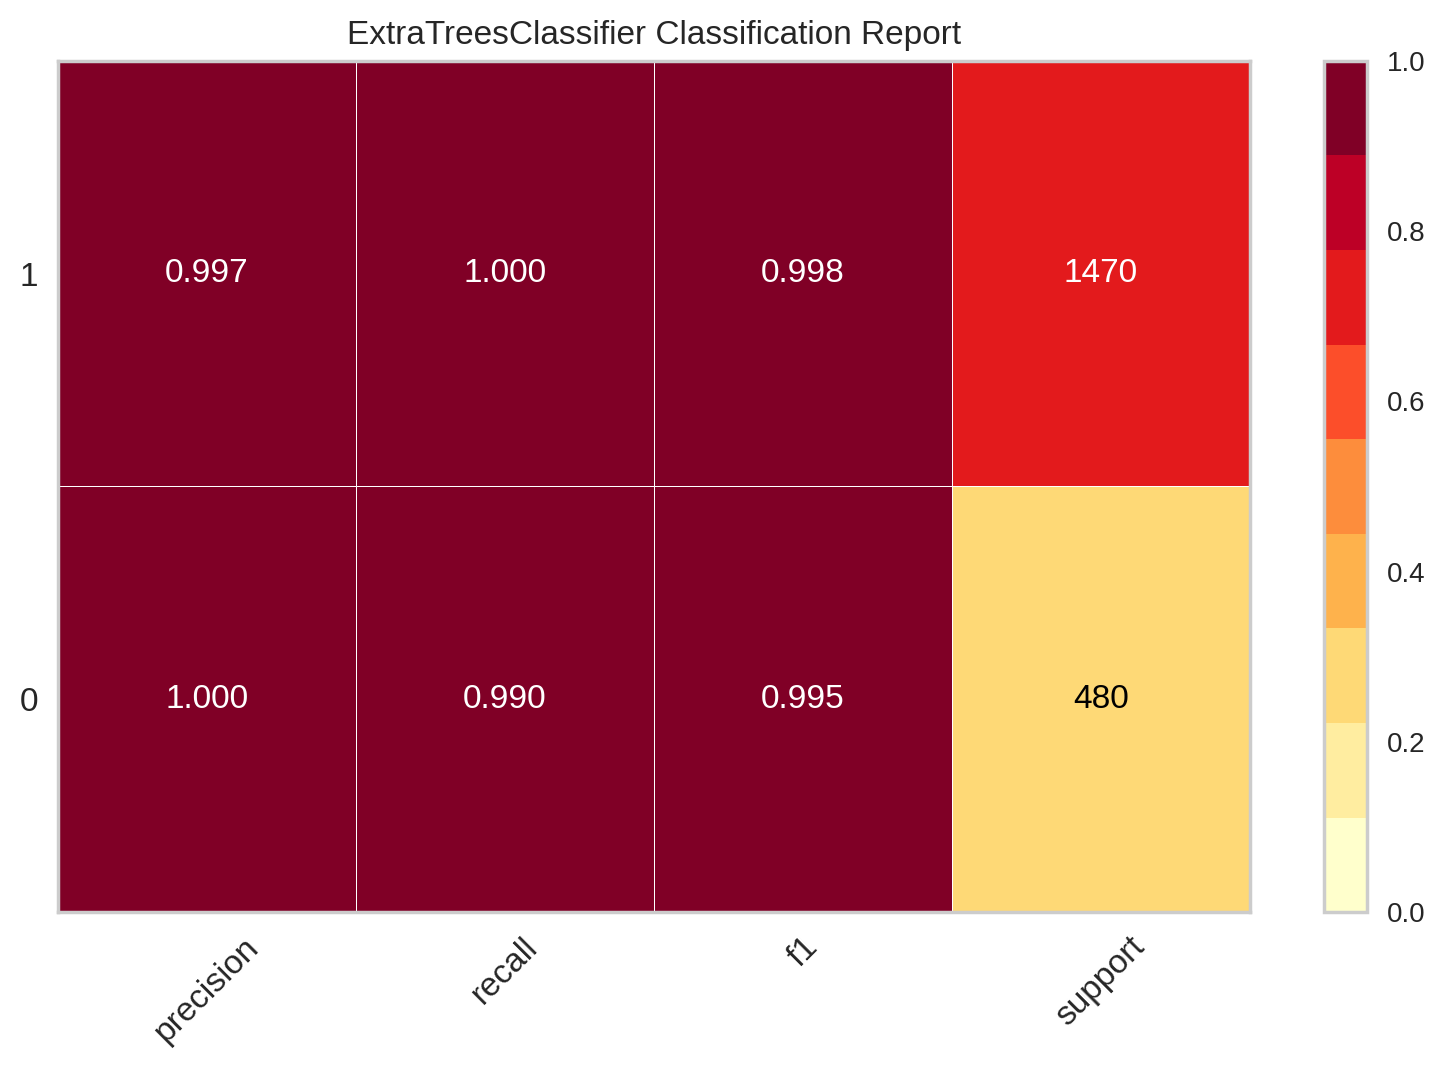

In [69]:
# to control the scale of plot
plot_model(best, plot = 'class_report', scale = 2)

In [70]:
# to save the plot
plot_model(best, plot = 'class_report', save=True)

'Class Report.png'

## ✅ Interpret Model

In [71]:
# train lightgbm model
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9912,0.9998,0.9912,0.9912,0.9912,0.9763,0.9763
1,0.9912,0.9988,0.9912,0.9912,0.9912,0.9763,0.9763
2,0.9956,0.9993,0.9956,0.9956,0.9956,0.9881,0.9882
3,0.9934,0.9998,0.9934,0.9934,0.9934,0.9823,0.9823
4,0.9978,1.0000,0.9978,0.9978,0.9978,0.9941,0.9941
5,0.9934,0.9991,0.9934,0.9934,0.9934,0.9822,0.9822
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9934,0.9998,0.9934,0.9934,0.9934,0.9821,0.9821
8,0.9956,0.9944,0.9956,0.9956,0.9956,0.9881,0.9881


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

## ✅ Get Leaderboard

In [74]:
# get leaderboard
lb = get_leaderboard()
lb

Processing:   0%|          | 0/54 [00:00<?, ?it/s]

,Model Name,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Index,,,,,,,,,
0,Logistic Regression,"(TransformerWrapperWithInverse(exclude=None, i...",0.9850,0.9935,0.9850,0.9851,0.9850,0.9593,0.9596
1,K Neighbors Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.9910,0.9964,0.9910,0.9910,0.9910,0.9757,0.9758
2,Naive Bayes,"(TransformerWrapperWithInverse(exclude=None, i...",0.9747,0.9870,0.9747,0.9756,0.9749,0.9330,0.9336
3,Decision Tree Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.9833,0.9785,0.9833,0.9834,0.9833,0.9551,0.9552
4,SVM - Linear Kernel,"(TransformerWrapperWithInverse(exclude=None, i...",0.9888,0.9942,0.9888,0.9889,0.9888,0.9698,0.9700
5,Ridge Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.9914,0.9947,0.9914,0.9915,0.9914,0.9768,0.9769
6,Random Forest Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.9941,0.9988,0.9941,0.9941,0.9940,0.9839,0.9840
7,Quadratic Discriminant Analysis,"(TransformerWrapperWithInverse(exclude=None, i...",0.9842,0.9931,0.9842,0.9848,0.9843,0.9580,0.9585
8,Ada Boost Classifier,"(TransformerWrapperWithInverse(exclude=None, i...",0.9934,0.9985,0.9934,0.9934,0.9934,0.9822,0.9823


In [75]:
# select the best model based on F1
lb.sort_values(by='F1', ascending=False)['Model'].iloc[0]

Pipeline(memory=Memory(location=None),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['fixed acidity',
                                             'volatile acidity', 'citric acid',
                                             'residual sugar', 'chlorides',
                                             'free sulfur dioxide',
                                             'total sulfur dioxide', 'density',
                                             'pH', 'sulphates...
                                                                subsample_for_bin=200000,
                                                                subsample_freq=0))],
                                    final_estimator=LogisticRegression(C=1.0,
                                                                       class_weight=None,
                                                                       dual=False,
                                                                       fit_intercept=True,
                                                                       intercept_scaling=1,
                                                                       l1_ratio=None,
                                                                       max_iter=1000,
                                                                       multi_class='auto',
                                                                       n_jobs=None,
                                                                       penalty='l2',
                                                                       random_state=123,
                                                                       solver='lbfgs',
                                                                       tol=0.0001,
                                                                       verbose=0,
                                                                       warm_start=False),
                                    n_jobs=-1, passthrough=False,
                                    stack_method='auto', verbose=0)]],
         verbose=False)

## AutoML

In [76]:
automl()

StackingClassifier(cv=5,
                   estimators=[('Extra Trees Classifier',
                                ExtraTreesClassifier(bootstrap=False,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='sqrt',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     monotonic_cst=None,
                                                     n_estimators=100,
                                                     n_...
                                               subsample_for_bin=200000,
                                               subsample_freq=0))],
                   final_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                      dual=False,
                                                      fit_intercept=True,
                                                      intercept_scaling=1,
                                                      l1_ratio=None,
                                                      max_iter=1000,
                                                      multi_class='auto',
                                                      n_jobs=None, penalty='l2',
                                                      random_state=123,
                                                      solver='lbfgs',
                                                      tol=0.0001, verbose=0,
                                                      warm_start=False),
                   n_jobs=-1, passthrough=False, stack_method='auto',
                   verbose=0)

## Create App

In [80]:
# create gradio app
create_app(best)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://b8c75e16bb84f3b499.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


## Create API

In [82]:
# create api
create_api(best, api_name = 'wine_classification_api')

API successfully created. This function only creates a POST API, it doesn't run it automatically. To run your API, please run this command --> !python wine_classification_api.py


## Create Docker

In [83]:
create_docker('wine_classification_api')

Writing requirements.txt
Writing Dockerfile
Dockerfile and requirements.txt successfully created.
    To build image you have to run --> !docker image build -f "Dockerfile" -t IMAGE_NAME:IMAGE_TAG .
            


## Finalize Model

In [84]:
final_best = finalize_model(best)

In [85]:
final_best

Pipeline(memory=Memory(location=None),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['fixed acidity',
                                             'volatile acidity', 'citric acid',
                                             'residual sugar', 'chlorides',
                                             'free sulfur dioxide',
                                             'total sulfur dioxide', 'density',
                                             'pH', 'sulphates...
                 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                      class_weight=None, criterion='gini',
                                      max_depth=None, max_features='sqrt',
                                      max_leaf_nodes=None, max_samples=None,
                                      min_impurity_decrease=0.0,
                                      min_samples_leaf=1, min_samples_split=2,
                                      min_weight_fraction_leaf=0.0,
                                      monotonic_cst=None, n_estimators=100,
                                      n_jobs=-1, oob_score=False,
                                      random_state=123, verbose=0,
                                      warm_start=False))],
         verbose=False)

## Convert Model

In [86]:
# transpiles learned function to java
print(convert_model(dt, language = 'java'))

public class Model {
    public static double[] score(double[] input) {
        double[] var0;
        if (input[4] <= 0.0872093066573143) {
            if (input[6] <= 0.10023041069507599) {
                if (input[4] <= 0.0672757513821125) {
                    if (input[8] <= 0.5077518224716187) {
                        if (input[9] <= 0.2118644118309021) {
                            var0 = new double[] {0.0, 1.0};
                        } else {
                            if (input[3] <= 0.012269936501979828) {
                                var0 = new double[] {0.0, 1.0};
                            } else {
                                var0 = new double[] {1.0, 0.0};
                            }
                        }
                    } else {
                        if (input[1] <= 0.06666667014360428) {
                            var0 = new double[] {0.0, 1.0};
                        } else {
                            var0 = new double[] {1.0, 0.0};
       

## Save / Load Model

In [87]:
# save model
save_model(best, 'wine_classification_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['fixed acidity',
                                              'volatile acidity', 'citric acid',
                                              'residual sugar', 'chlorides',
                                              'free sulfur dioxide',
                                              'total sulfur dioxide', 'density',
                                              'pH', 'sulphates...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='sqrt',
                    

In [88]:
# load model
loaded_from_disk = load_model('wine_classification_model')
loaded_from_disk

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['fixed acidity',
                                             'volatile acidity', 'citric acid',
                                             'residual sugar', 'chlorides',
                                             'free sulfur dioxide',
                                             'total sulfur dioxide', 'density',
                                             'pH'...
                 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                      class_weight=None, criterion='gini',
                                      max_depth=None, max_features='sqrt',
                                      max_leaf_nodes=None, max_samples=None,
                                      min_impurity_decrease=0.0,
                                      min_samples_leaf=1, min_samples_split=2,
                                      min_weight_fraction_leaf=0.0,
                                      monotonic_cst=None, n_estimators=100,
                                      n_jobs=-1, oob_score=False,
                                      random_state=123, verbose=0,
                                      warm_start=False))],
         verbose=False)

## Save / Load Experiment

In [89]:
# save experiment
save_experiment('wine_experiment')

In [90]:
# load experiment from disk
exp_from_disk = load_experiment('wine_experiment', data=data)

,Description,Value
0,Session id,123
1,Target,type
2,Target type,Binary
3,Target mapping,"red: 0, white: 1"
4,Original data shape,"(6497, 13)"
5,Transformed data shape,"(6497, 13)"
6,Transformed train set shape,"(4547, 13)"
7,Transformed test set shape,"(1950, 13)"
8,Numeric features,12
9,Preprocess,True
